We demonstrate a range of test here for how leakage is detected using our repostory.
We showcase different types of scrambling with different parameteres.
## What to expect:
- **Image file:** the image is downloaded each time you run a test from this [link](https://openneuro.org/datasets/ds003826/versions/3.0.1) which OpenNeuro is hosting.
- **Method:** Each cell in this notebook is associated with different scrambling method and its parameters.
- **Visualization:** At the bottom of a ran cells, if the test case is involved in a loop, we present a visualization to track leakage. We expect to detect less leakage as the intensity of the scrambling method goes higher.
- The x-axis in the plots shows scrambling parameter, and y-axis shows leakage values.
- **Report:** A single test case has a report as well, where you can see leakage in more details.

# Import libraries

In [1]:
import os, sys, subprocess, csv, random, wget, shutil
import numpy as np
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Test functions

In [2]:
def viz(f, crit): 
    pl = [float(x[0]) for x in f]
    fl = [int(x[1]) for x in f]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.plot(list(crit),pl, color='skyblue')
    ax1.set_title("Partial Leakage")
    
    ax2.plot(list(crit),fl, color='skyblue')
    ax2.set_title("Full Leakage")
    
    plt.tight_layout()
    plt.show()

def run_test(files=list, opt=list, scramble=True, clean=True, disp=False):
    
    os.makedirs("img", exist_ok=True)
    link_original = "https://s3.amazonaws.com/openneuro.org/ds003826/sub-02/anat/sub-02_T1w.nii.gz?versionId=2zRivZaztVdjsig2hWgHLJCj5542CdeK"
    wget.download(link_original)
    os.makedirs("input/anat/original", exist_ok=True)
    file_ = [os.path.join(root, file) for root, _, files in os.walk(os.getcwd()) for file in files if file.endswith(".gz")]
    shutil.copy2(file_[0], "input/anat/original")
    os.remove(file_[0])
    print(f"\nOriginal file downloaded.")
    script = os.path.join(os.path.dirname(os.getcwd()), "run_test.py")
    original = files[0]
    scrambled = files[1]
    params = {
        "input": original,
        "output": scrambled,
        "opts": opts
    }
    if scramble:
        ! scramble "{params['input']}" "{params['output']}" {" ".join(params['opts'])}
    print(f"Original file is scrambled.")
    result= subprocess.run(
        ["python3", script, original, scrambled, "True"],
        capture_output=True,
        text=True
    )
    print(f"Analysis is finished.")
    print(result.stdout)
    
    if disp:
        with open("report/sub-02.html") as f:
            display(HTML(f.read()))
    print(f"Cleaning up ...")    
    if clean:
        ! rm -r input report img


# Method: Wobble
We demonstrate a test case in if scrambling is "Wobble" with different parameters. We expect lesser leakage as the intensity of wobbling is higher.
At the bottom, we visualize the result of **full** and **partial leakage** where x-axis shows the wobbling intensity and y-axis is leakage 

100% [......................................................] 8495199 / 8495199
Original file downloaded.
Found 1 input files and 0 directories using '(?!\.).*'
Saving: /indirect/staff/vincentajoubi/Don't look/DL/test/input/anat/scrambled/sub-02_T1w.nii.gz
Original file is scrambled.                                                     01s/file]
Analysis is finished.
########################################
 - Subject ID: sub-02
 - Shape: (176, 248, 256)
########################################
 - Full-volume Spatiotemporal Analysis
	 - Dimension[X]: 	Full Leakage: 0/176 slices	Partial Leakage: 0.75
	 - Dimension[Y]: 	Full Leakage: 0/248 slices	Partial Leakage: 0.81
	 - Dimension[Z]: 	Full Leakage: 0/256 slices	Partial Leakage: 0.71
 - Partial Leakage: 0.76
 - Full Leakage: False

Total time taken: 00:00:16

Cleaning up ...
100% [......................................................] 8495199 / 8495199
Original file downloaded.
Found 1 input files and 0 directories using '(?!\.).*'
Savi

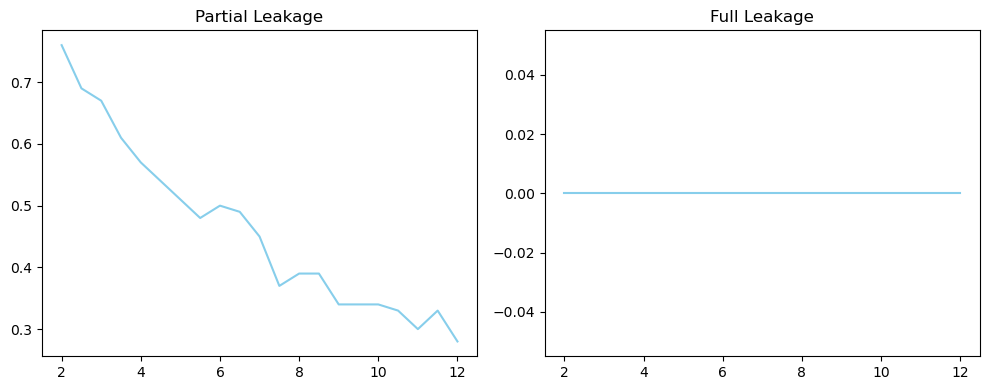

In [3]:
opts = ["nii", "wobble", "-a ", "_"]
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, scrambled] 
crit = np.arange(2.0, 12.5, 0.5, dtype=float)

for p in crit:
    opts[3] = str(p)
    run_test(files, opt=opts, clean= False)

with open("result.tsv", "r") as file:
    f = csv.reader(file, delimiter="\t")
    f = [row for row in f]
        
viz(f,crit)
! rm result.tsv

# Method: Scatter

In [4]:
opts = ["nii", "scatter", "_"]
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, scrambled]
crit = np.arange(3, 13.5, 0.5, dtype=float)

for p in crit:
    opts[2] = str(p)
    run_test(files, opt=opts, clean= True)

with open("result.tsv", "r") as file:
    f = csv.reader(file, delimiter="\t")
    f = [row for row in f]
        
viz(f,crit)
! rm result.tsv

100% [......................................................] 8495199 / 8495199
Original file downloaded.
Found 1 input files and 0 directories using '(?!\.).*'
window: [5 6 6]                                                                  ?file/s]
step: [2, 3, 3]
Saving: /indirect/staff/vincentajoubi/Don't look/DL/test/input/anat/scrambled/sub-02_T1w.nii.gz
Original file is scrambled.                                                     21s/file]
Analysis is finished.
########################################
 - Subject ID: sub-02
 - Shape: (176, 248, 256)
########################################
 - Full-volume Spatiotemporal Analysis
	 - Dimension[X]: 	Full Leakage: 0/176 slices	Partial Leakage: 0.71
	 - Dimension[Y]: 	Full Leakage: 0/248 slices	Partial Leakage: 0.73
	 - Dimension[Z]: 	Full Leakage: 0/256 slices	Partial Leakage: 0.68
 - Partial Leakage: 0.71
 - Full Leakage: False

Total time taken: 00:00:16

Cleaning up ...
100% [.....................................................

KeyboardInterrupt: 

# Method: Permutation
In this case we **permute** the image to see how scramble affect the leakage.
Permutation is done in two different ways.

- Independently where we pass **-i** as argument, which all arrays in the given axis are permuted independently.
- Without **-i** the given axis remain as it is, while other axis are permuted.
  
We test permutation on each axis w/o passing **-i** as argument

100% [......................................................] 8495199 / 8495199Found 1 input files and 0 directories using '(?!\.).*'
Saving: /indirect/staff/vincentajoubi/Don't look/DL/test/input/anat/scrambled/sub-02_T1w.nii.gz
100% [......................................................] 8495199 / 8495199 22file/s]
Original file downloaded.
Original file is scrambled.
Analysis is finished.
########################################
 - Subject ID: sub-02
 - Shape: (176, 248, 256)
########################################
 - Full-volume Spatiotemporal Analysis
	 - Dimension[X]: 	Full Leakage: 0/176 slices	Partial Leakage: 0.42
	 - Dimension[Y]: 	Full Leakage: 0/248 slices	Partial Leakage: 0.35
	 - Dimension[Z]: 	Full Leakage: 0/256 slices	Partial Leakage: 0.24
 - Partial Leakage: 0.34
 - Full Leakage: False

Total time taken: 00:00:16

Cleaning up ...
100% [......................................................] 8495199 / 8495199Found 1 input files and 0 directories using '(?!\.).*'
Savi

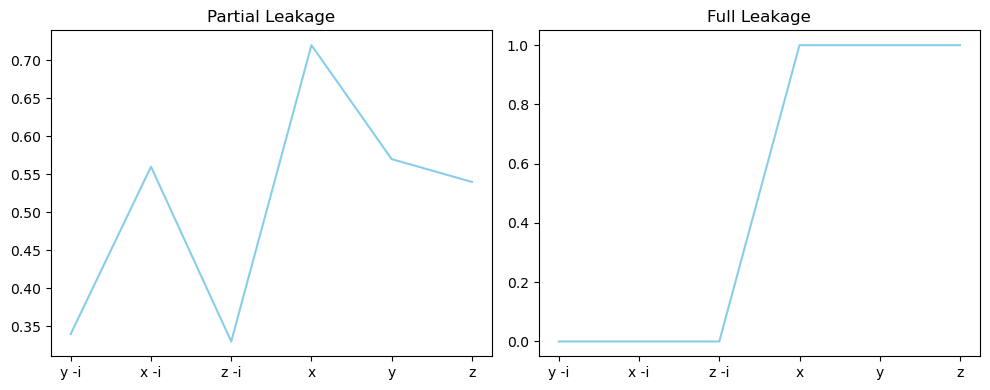

In [11]:
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, scrambled]
opts = ["nii", "permute", 
        [["y -i"], ["x -i"], ["z -i"], ["x"], ["y"], ["z"]]] 

for i in opts[2]:
    link_original = "https://s3.amazonaws.com/openneuro.org/ds003826/sub-02/anat/sub-02_T1w.nii.gz?versionId=2zRivZaztVdjsig2hWgHLJCj5542CdeK"
    wget.download(link_original)
    os.makedirs("input/anat/original", exist_ok=True)
    file_ = [os.path.join(root, file) for root, _, files in os.walk(os.getcwd()) for file in files if file.endswith(".gz")]
    shutil.copy2(file_[0], "input/anat/original")
    os.remove(file_[0])
    opt_ = " ".join([opts[0], opts[1], i[0]]).split(" ")
    ! scramble "{files[0]}" "{files[1]}" {" ".join(opt_)}
    run_test(files, opt=opt_, clean=True, scramble=False)

with open("result.tsv", "r") as file:
    f = csv.reader(file, delimiter="\t")
    f = [row for row in f]
        
viz(f,[i[0] for i in opts[2]])
! rm result.tsv

# Method: Original Vs. Original
We test same original image and we expect to see completely partial leakage as well as full leakage.
In the visualization you can see the distribution of **np.allclose** which identifies all slices are similar.

100% [......................................................] 8495199 / 8495199
Original file downloaded.
Original file is scrambled.
Analysis is finished.
########################################
 - Subject ID: sub-02
 - Shape: (176, 248, 256)
########################################
 - Full-volume Spatiotemporal Analysis
	 - Dimension[X]: 	Full Leakage: 176/176 slices	Partial Leakage: 1.0
	 - Dimension[Y]: 	Full Leakage: 229/248 slices	Partial Leakage: 1.0
	 - Dimension[Z]: 	Full Leakage: 247/256 slices	Partial Leakage: 1.0
 - Partial Leakage: 1.0
 - Full Leakage: True
 - Please consider applying scramble on your dataset again.

Total time taken: 00:00:16




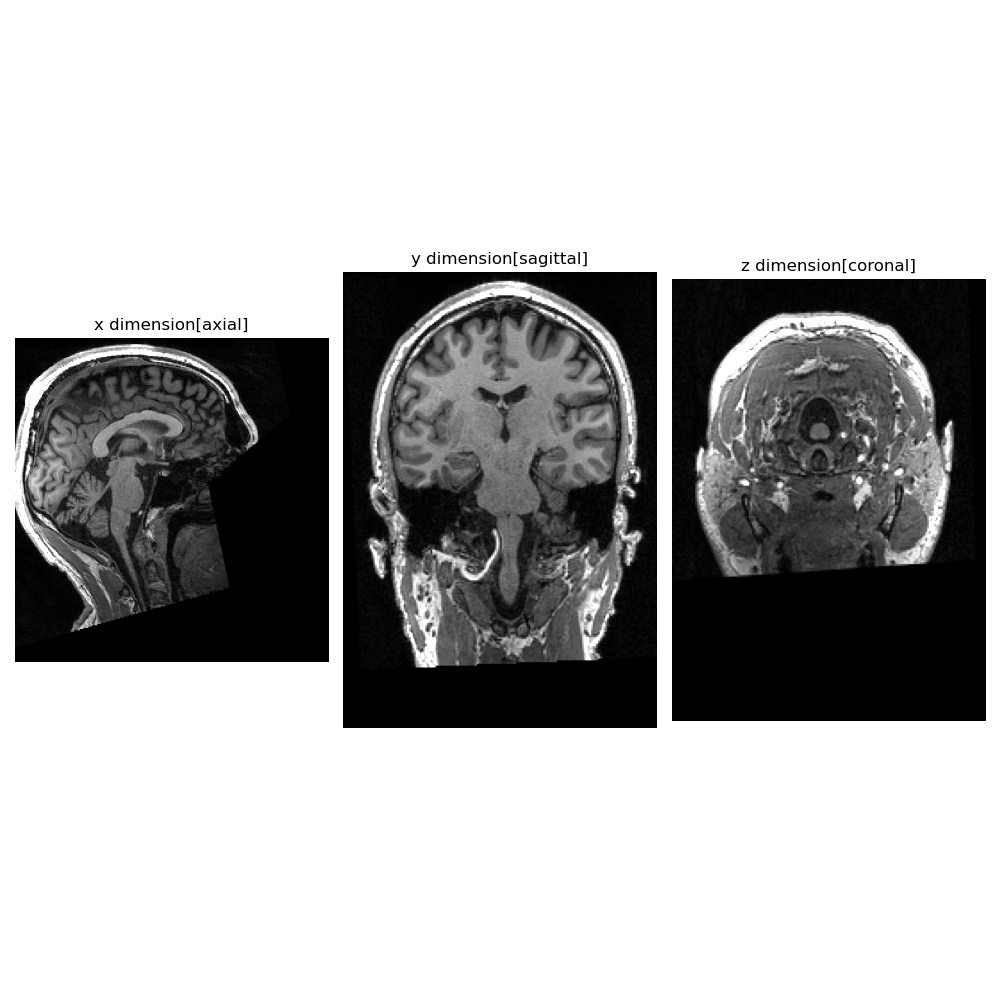
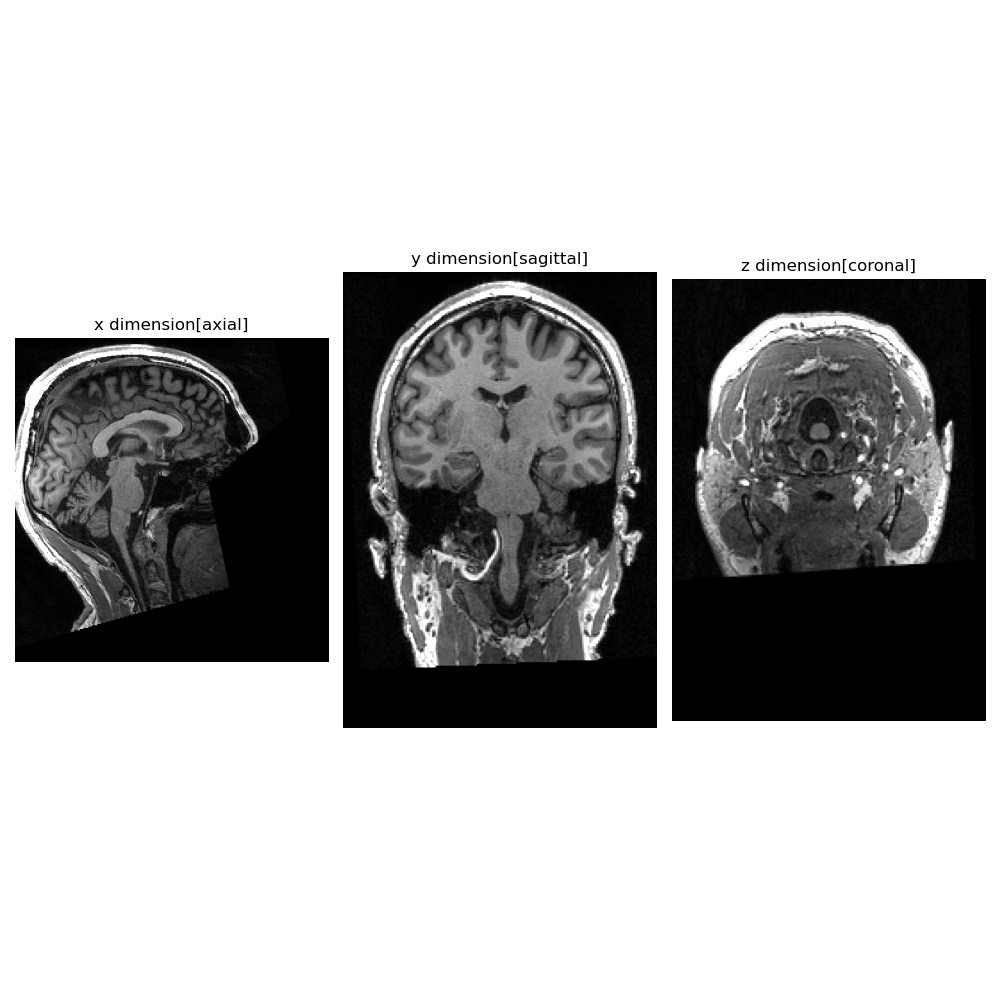
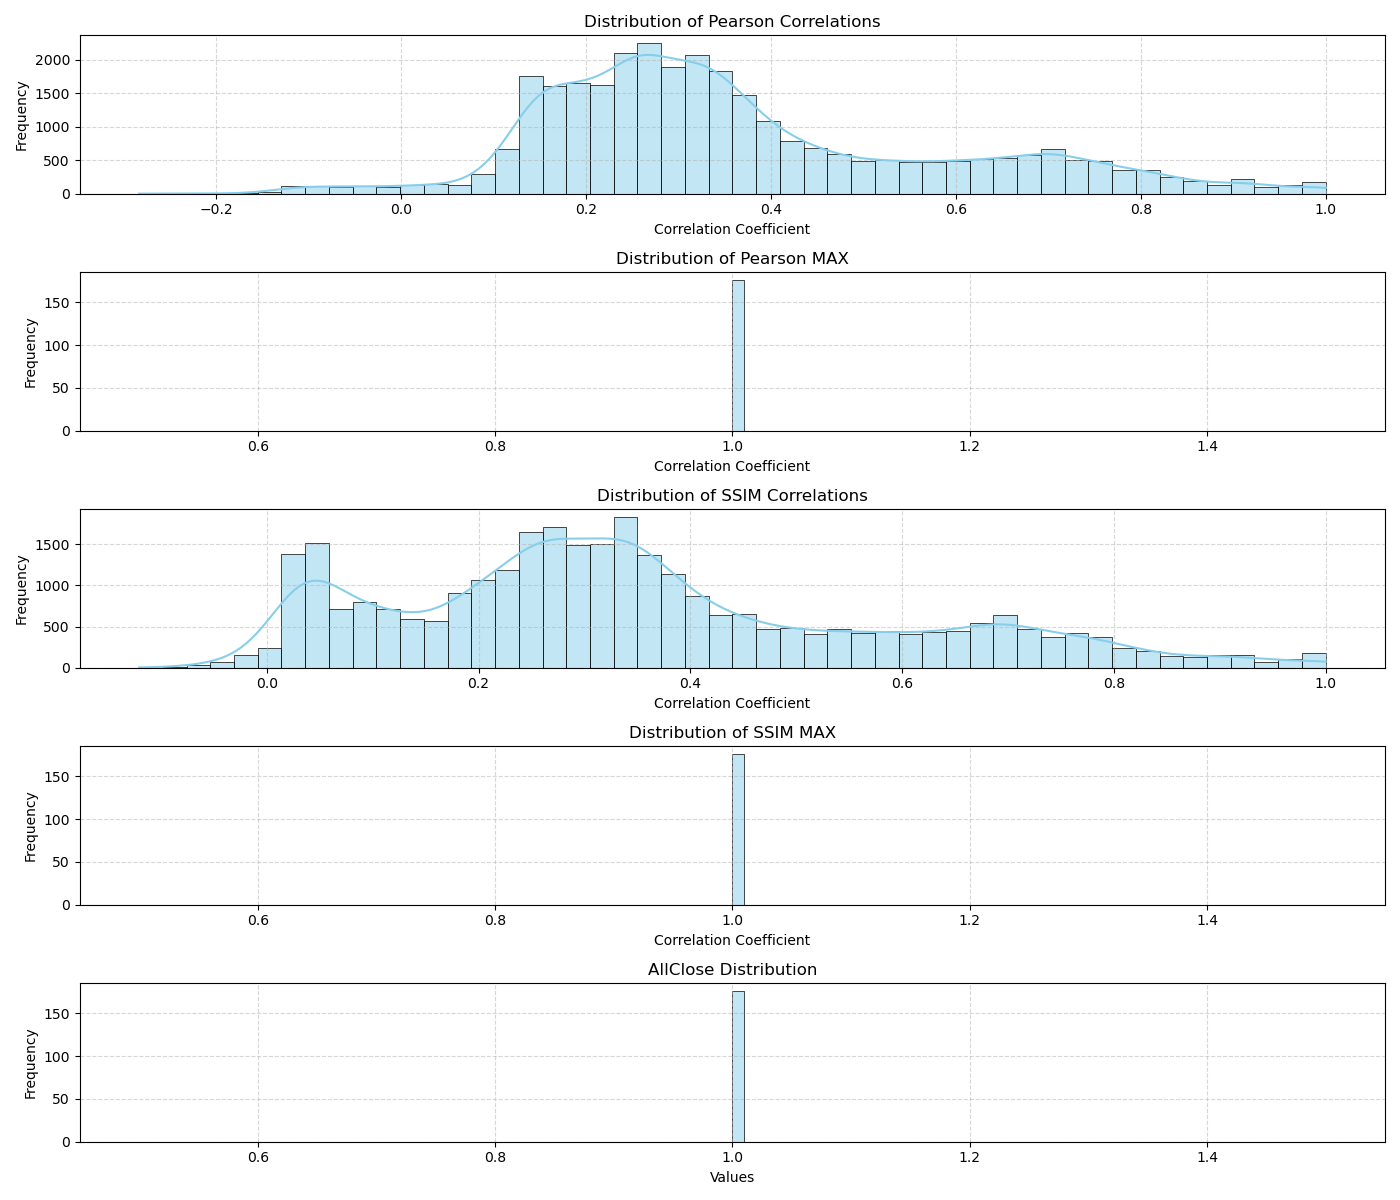
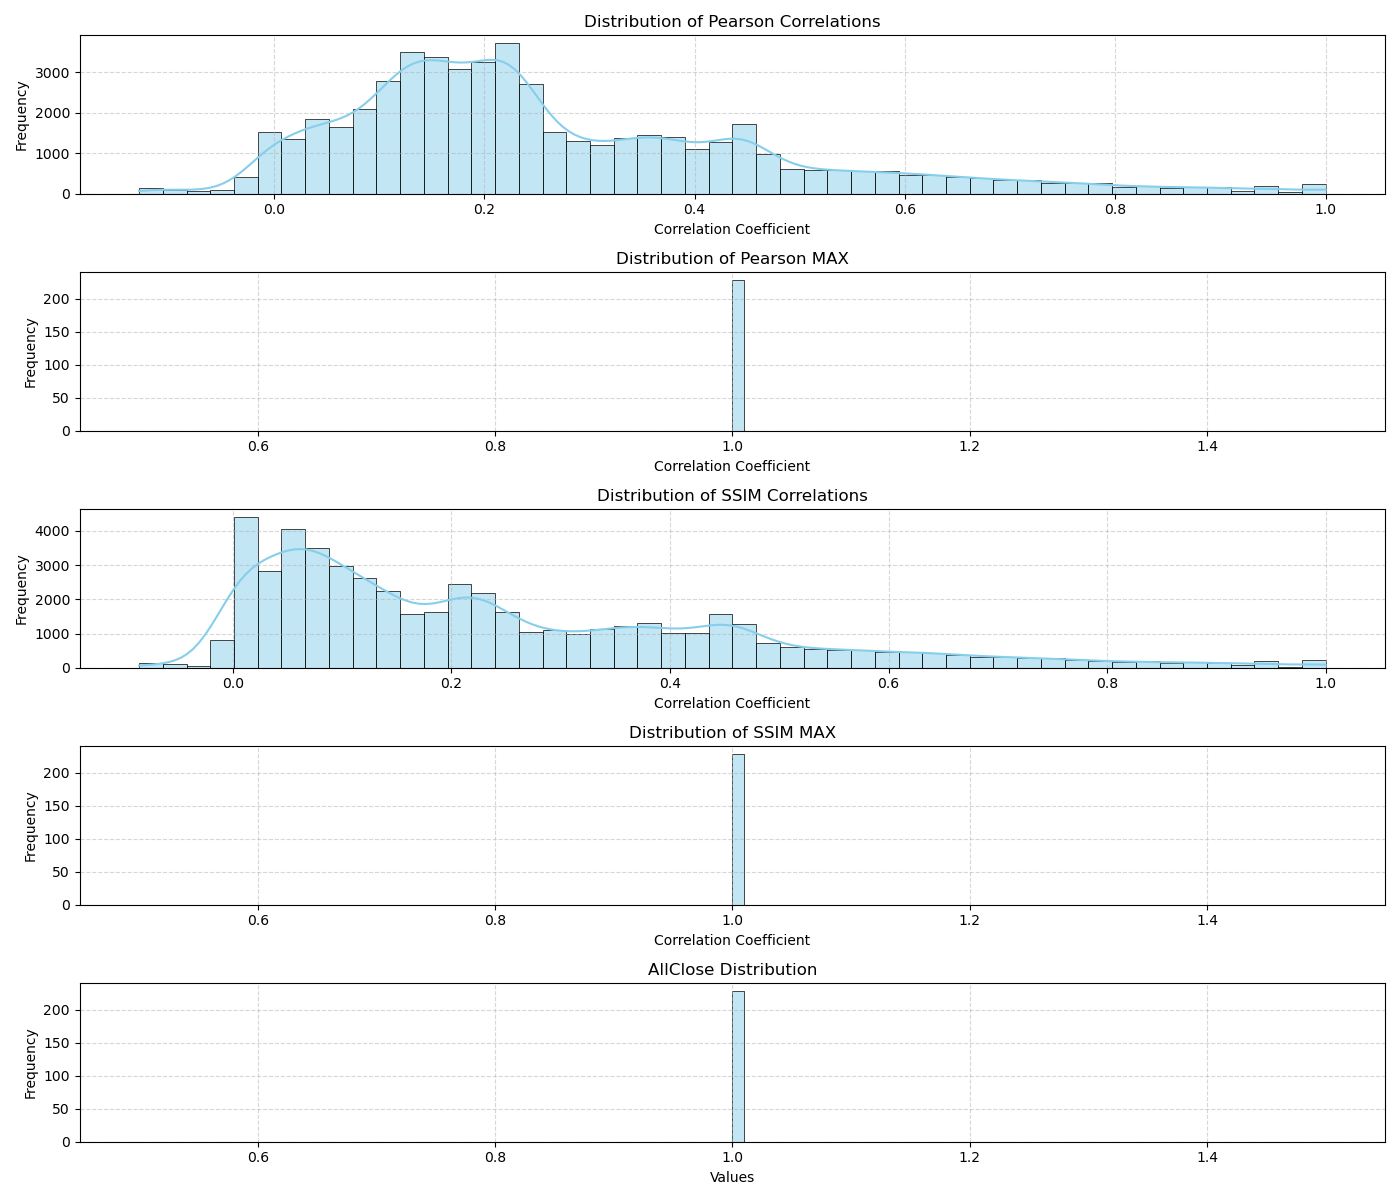
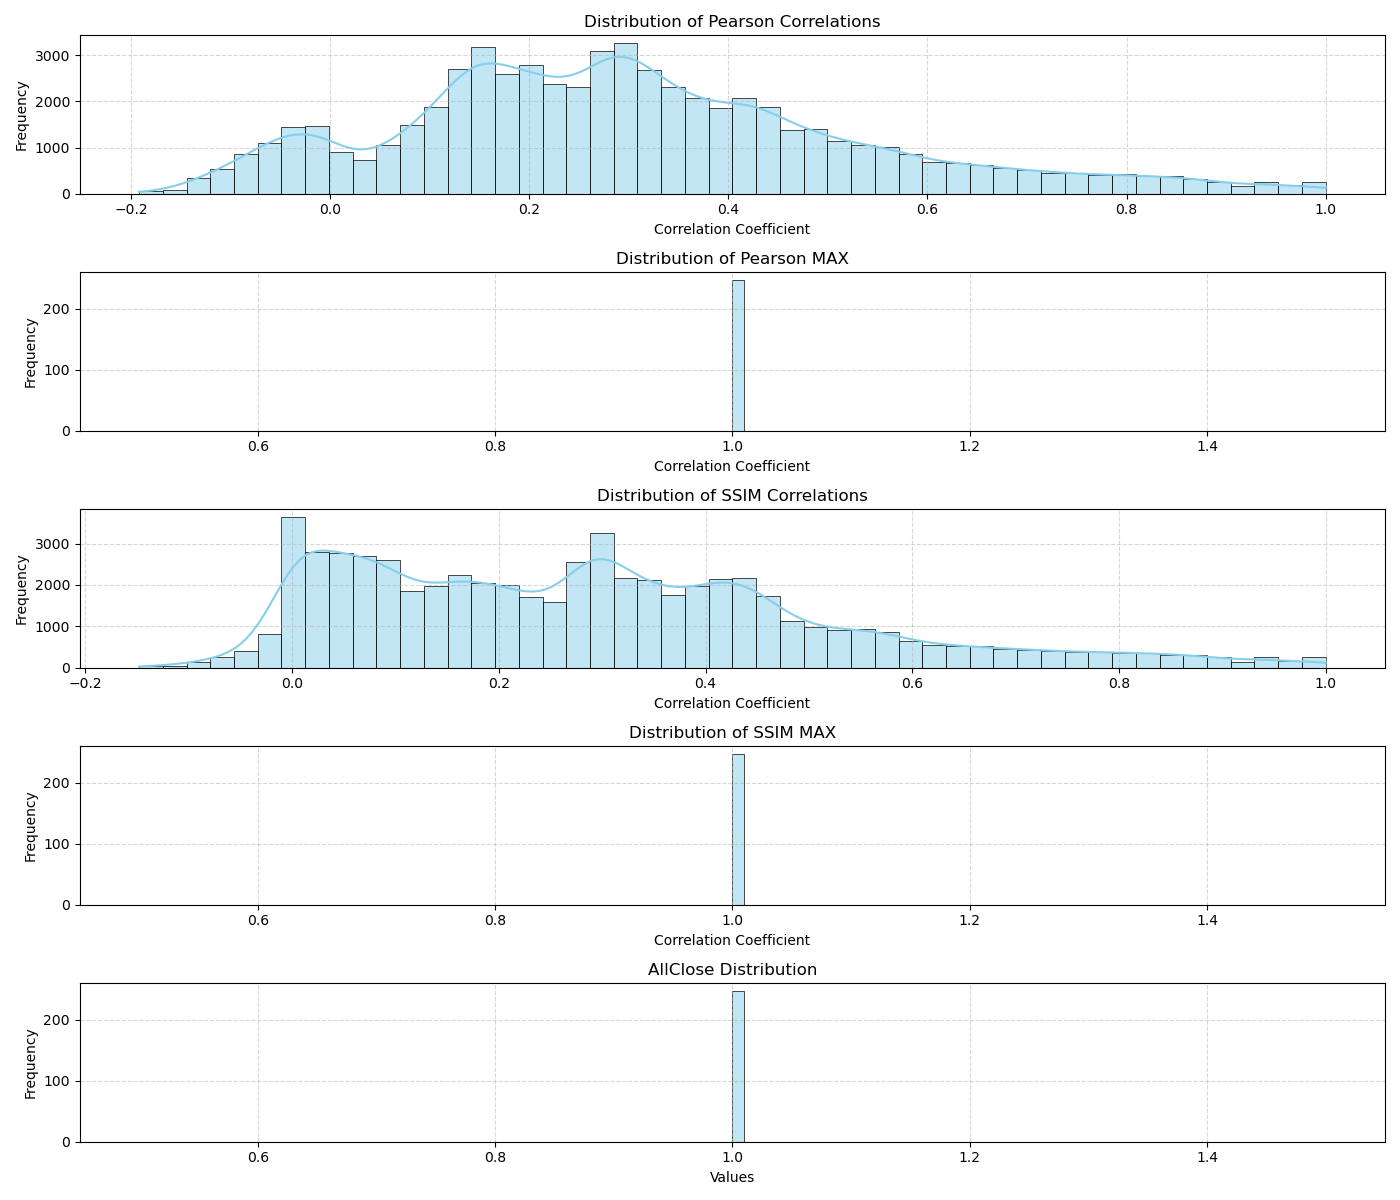

Cleaning up ...


In [8]:
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, original]
run_test(files, scramble=False, clean=False, disp=True) # NOTE: If original vs. original, then clean=False, otherwise original file gets deleted.

# Method: Blur

In [ ]:
opts = ["nii", "blur", "_"]
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, scrambled] 
crit = np.arange(2.0, 12.0, 2.0, dtype=float)

for p in crit:
    opts[2] = str(p)
    run_test(files, opt=opts, clean= False)

with open("result.tsv", "r") as file:
    f = csv.reader(file, delimiter="\t")
    f = [row for row in f]
        
viz(f,crit)
! rm result.tsv

# Scrambling: Permute -independently
# slice replaced
Here we randomly replace slices of original image to the exact position of the permuted version. Permutation is done independently, so the image is totally unrecognizable, regardless of which axis.

In order to randomly replace slices, you need to manually open the script **run_test.py** and search for the variable **random_replace** which is set to **False**. This should be set to **True**. After testing randomly replace slices, this should set back to False. 

100% [......................................................] 8495199 / 8495199
Original file downloaded.
Found 1 input files and 0 directories using '(?!\.).*'
Saving: /indirect/staff/vincentajoubi/Don't look/DL/test/input/anat/scrambled/sub-02_T1w.nii.gz
Original file is scrambled.                                                     57file/s]
Analysis is finished.
########################################
 - Subject ID: sub-02
 - Shape: (176, 248, 256)
########################################
 - Full-volume Spatiotemporal Analysis
	 - Dimension[X]: 	Full Leakage: 4/176 slices	Partial Leakage: 1.0
	 - Dimension[Y]: 	Full Leakage: 5/248 slices	Partial Leakage: 1.0
	 - Dimension[Z]: 	Full Leakage: 5/256 slices	Partial Leakage: 1.0
 - Partial Leakage: 1.0
 - Full Leakage: True
 - Please consider applying scramble on your dataset again.

Total time taken: 00:00:16




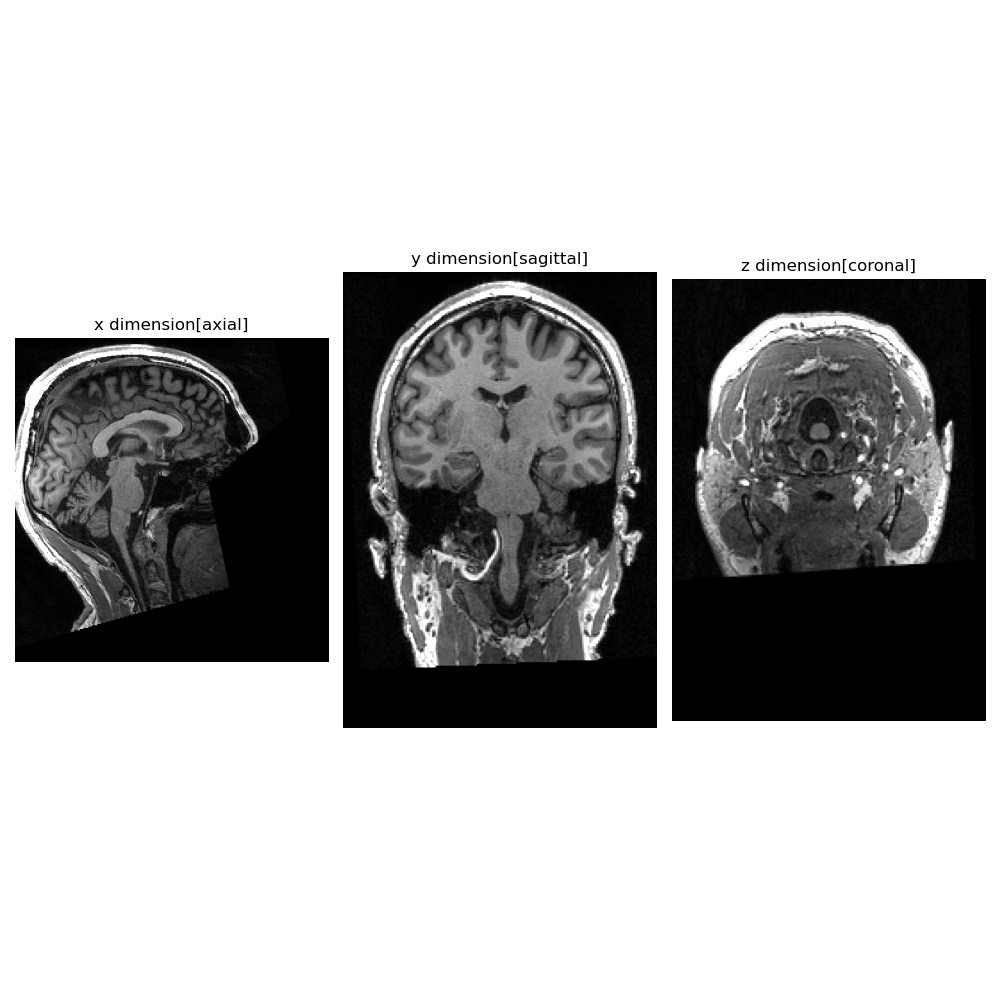
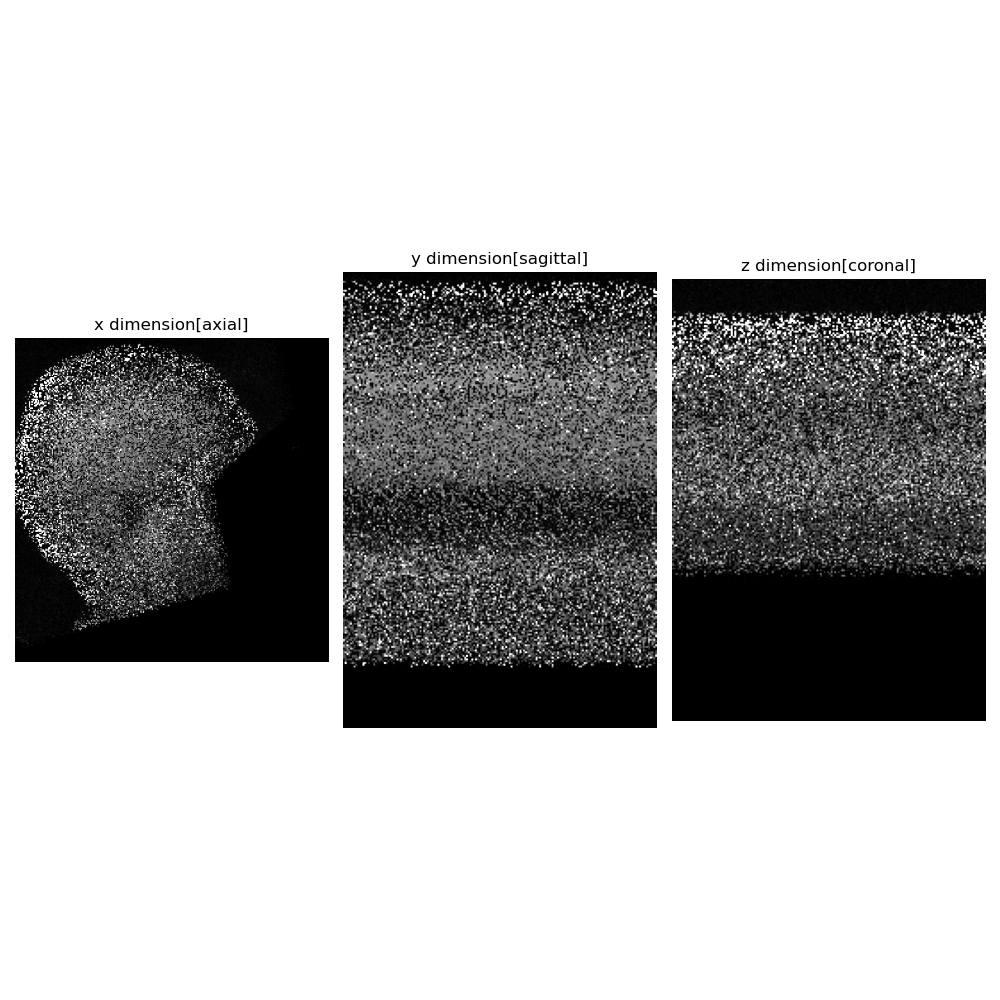
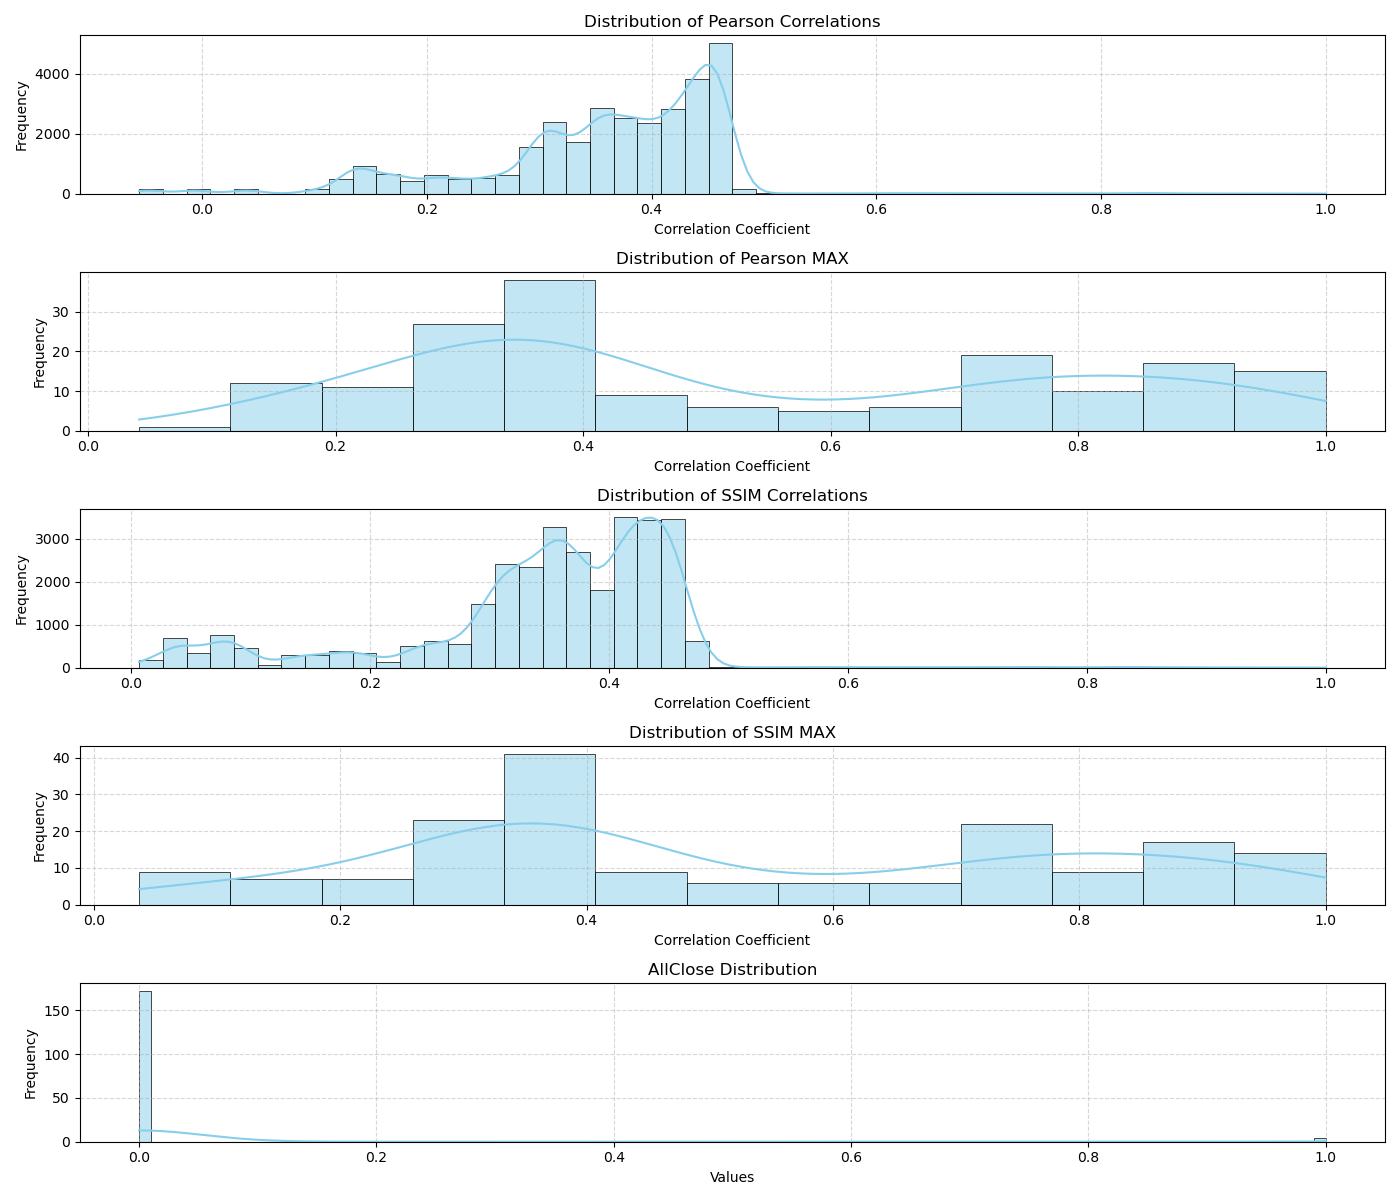
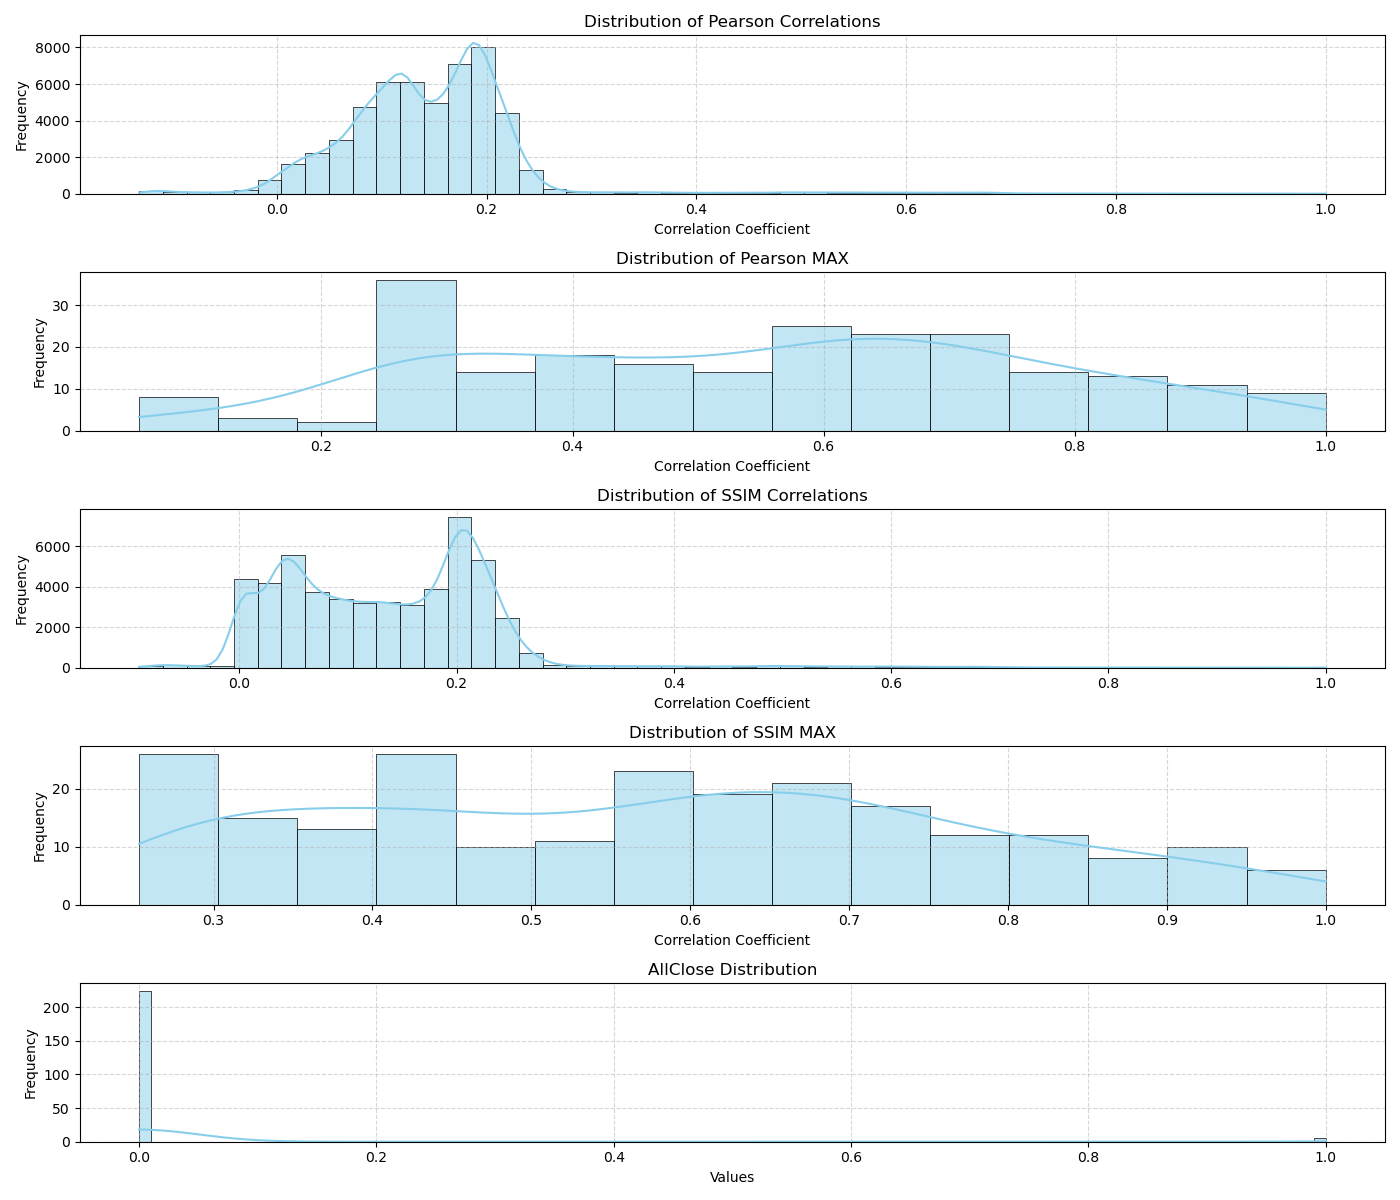
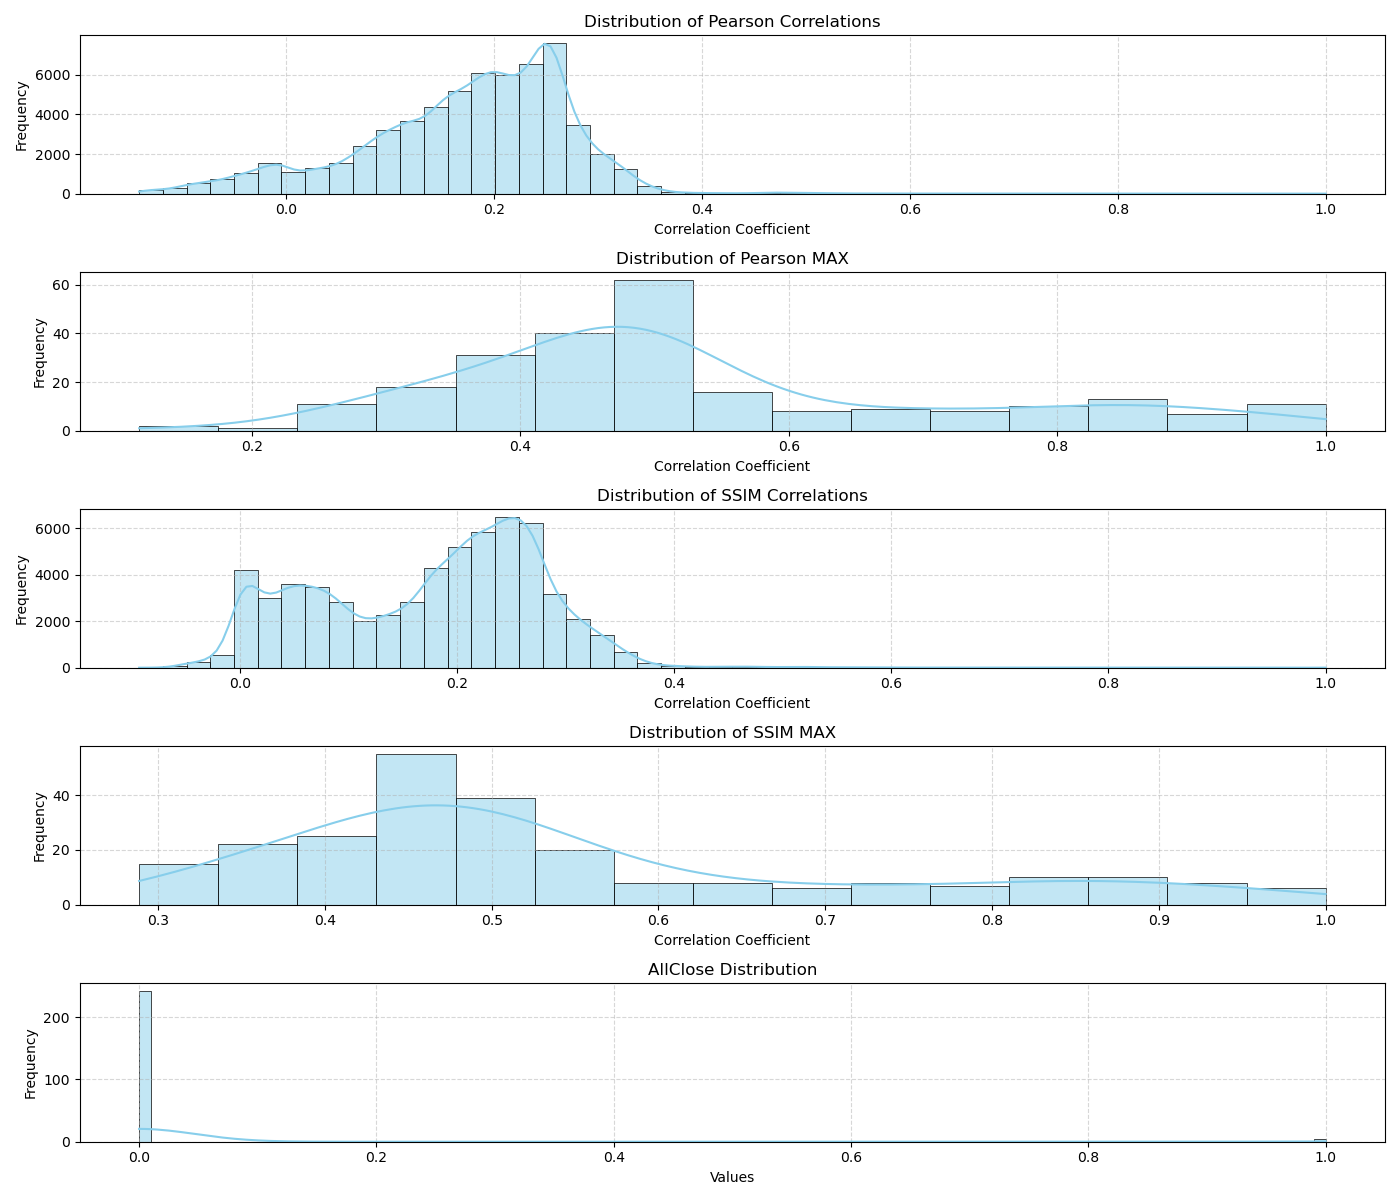

Cleaning up ...


In [7]:
original = "input/anat/original/"
scrambled = "input/anat/scrambled/"
files = [original, scrambled]
opts = ["nii", "permute", "x -i"] 

run_test(files, opt=opts, clean=True, disp=True)